In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import quantstats_lumi as qs
import requests
import math

from tqdm import tqdm

plt.style.use("ggplot")

In [61]:
data = pd.read_excel("FTSEMIB_tickers.xlsx")

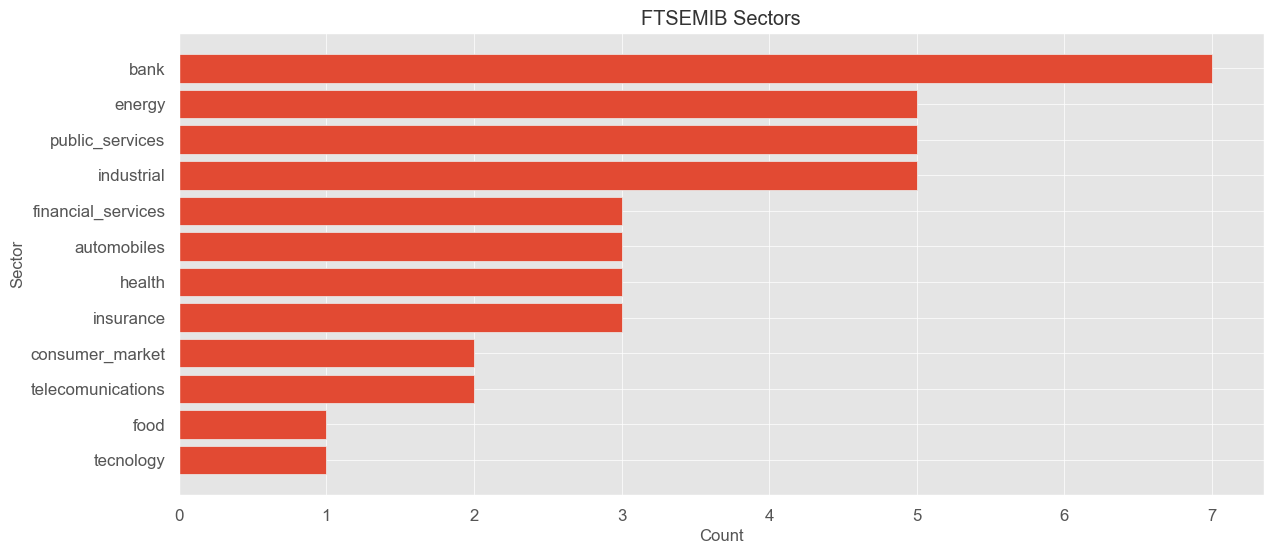

In [62]:
count = data["sector"].value_counts()[::-1]

fig, ax = plt.subplots(figsize=(14, 6))

ax.barh(count.index, count.values)
ax.set_ylabel("Sector")
ax.set_xlabel("Count")
ax.set_title("FTSEMIB Sectors")
plt.show()

In [64]:
previousClose = []
marketCap = []
shares = []

for stock in tqdm(data["ticker"]):
    ticker = yf.Ticker(stock)
    previousClose.append(ticker.fast_info["previousClose"])
    marketCap.append(ticker.fast_info["marketCap"])
    shares.append(ticker.fast_info["shares"])
        
data["previousClose"] = previousClose
data["marketCap"] = marketCap
data["shares"] = shares

100%|██████████| 40/40 [00:11<00:00,  3.53it/s]


In [89]:
sector_capitalization = data[["sector", "marketCap"]].groupby("sector").sum()
sector_capitalization.sort_values(by="marketCap", ascending=True, inplace=True)

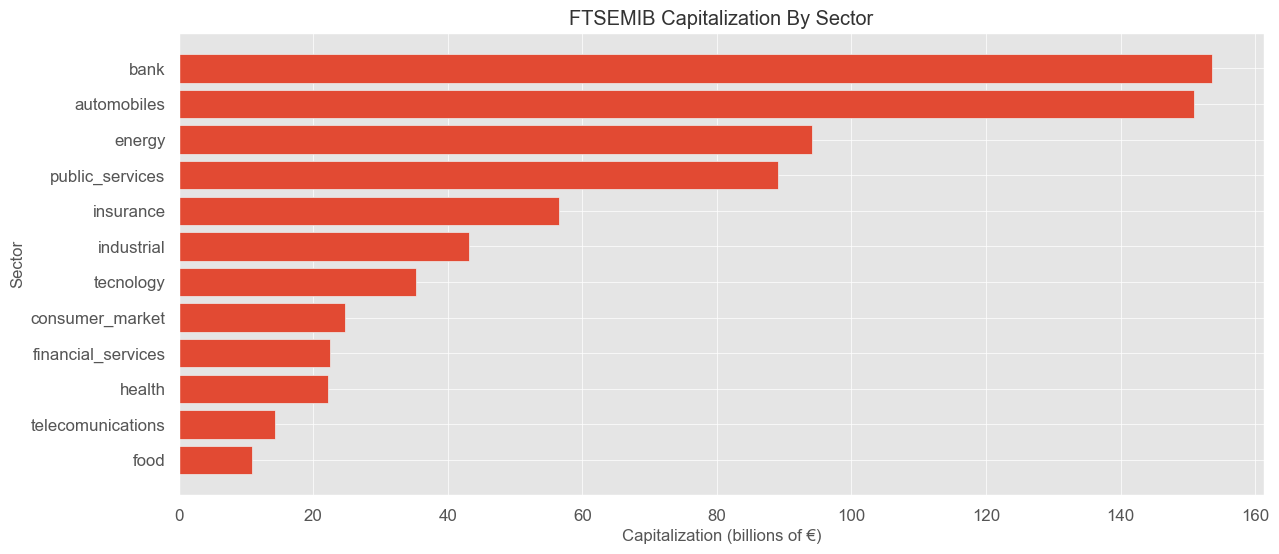

In [93]:
fig, ax = plt.subplots(figsize=(14, 6))

ax.barh(sector_capitalization.index, sector_capitalization["marketCap"].values / 1_000_000_000)
ax.set_ylabel("Sector")
ax.set_xlabel("Capitalization (billions of €)")
ax.set_title("FTSEMIB Capitalization By Sector")
plt.show()